# Guide for twinpy/plot/band_structure.py

In [121]:
%aiida
%reload_ext autoreload
%autoreload 2

In [122]:
import os
import sys
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
import twinpy
from twinpy.interfaces.aiida import AiidaShearWorkChain
from twinpy.analysis.shear_analyzer import ShearAnalyzer
from twinpy.plot.band_structure import *

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

shear_pk = 309999  # twinpy

In [123]:
aiida_shear = AiidaShearWorkChain(load_node(shear_pk))
analyzer = aiida_shear.get_analyzer()

# def get_labels_for_twin

In [124]:
show_info(get_labels_for_twin)
pprint(get_labels_for_twin())

====== START method information ======

# ---------
# docstring
# ---------

    Get labels for hexagonal twin.

    Returns:
        dict: Contain keys and qpoints.

    Examples:
        Labels and qpoints for twin is as bellow.

        >>> label_qpoints = {
                'GAMMA': [0, 0, 0],
                'M_1'  : [1/2, 0, 0],
                'M_2'  : [-1/2, 1/2, 0],
                'K_1'  : [1/3, 1/3, 0],
                'K_2'  : [-1/3, 2/3, 0],
                'A'    : [0, 0, 1/2],
                'L_1'  : [1/2, 0, 1/2],
                'L_2'  : [-1/2, 1/2, 1/2],
                'H_1'  : [1/3, 1/3, 1/2],
                'H_2'  : [-1/3, 2/3, 1/2],
                }
    

======= END method information =======


{'A': [0, 0, 0.5],
 'GAMMA': [0, 0, 0],
 'H_1': [0.3333333333333333, 0.3333333333333333, 0.5],
 'H_2': [-0.3333333333333333, 0.6666666666666666, 0.5],
 'K_1': [0.3333333333333333, 0.3333333333333333, 0],
 'K_2': [-0.3333333333333333, 0.6666666666666666, 0],
 'L_1': [0.5,

# def get_labels_band_paths_from_seekapth

In [127]:
show_info(get_seekpath)
cell = analyzer.relax_cells[0]
skp = get_seekpath(cell=cell)
pprint(skp)

====== START method information ======

# ---------
# docstring
# ---------

    Get seekpath results.

    Args:
        cell (tuple): Cell.

    Returns:
        dict: Labels and corresponding qpoints.
    

======= END method information =======


{'augmented_path': False,
 'bravais_lattice': 'hP',
 'bravais_lattice_extended': 'hP2',
 'conv_lattice': array([[ 3.17239971,  0.        ,  0.        ],
       [-1.58619985,  2.74737874,  0.        ],
       [ 0.        ,  0.        ,  5.14289947]]),
 'conv_positions': array([[0.33333333, 0.66666667, 0.25      ],
       [0.66666667, 0.33333333, 0.75      ]]),
 'conv_types': array([12, 12], dtype=int32),
 'has_inversion_symmetry': True,
 'inverse_primitive_transformation_matrix': array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]),
 'path': [('GAMMA', 'M'),
          ('M', 'K'),
          ('K', 'GAMMA'),
          ('GAMMA', 'A'),
          ('A', 'L'),
          ('L', 'H'),
          ('H', 'A'),
          ('L', 'M'),
          ('H', 'K')]

# def get_labels_band_paths_from_seekapth

In [128]:
show_info(get_labels_band_paths_from_seekpath)
cell = analyzer.relax_cells[0]
labels, band_paths = get_labels_band_paths_from_seekpath(cell=cell)
print("# labels")
print(labels)
print("")
print("# band_paths")
pprint(band_paths)

====== START method information ======

# ---------
# docstring
# ---------

    Get labels and band paths from seekpath result.

    Args:
        cell (tuple): Cell.

    Returns:
        list: labels
        np.array: band paths
    

======= END method information =======


# labels
['GAMMA', 'M', 'K', 'GAMMA', 'A', 'L', 'H', 'A', 'L', 'M', 'H', 'K']

# band_paths
[[[0.0, 0.0, 0.0],
  [0.5, 0.0, 0.0],
  [0.3333333333333333, 0.3333333333333333, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.5],
  [0.5, 0.0, 0.5],
  [0.3333333333333333, 0.3333333333333333, 0.5],
  [0.0, 0.0, 0.5]],
 [[0.5, 0.0, 0.5], [0.5, 0.0, 0.0]],
 [[0.3333333333333333, 0.3333333333333333, 0.5],
  [0.3333333333333333, 0.3333333333333333, 0.0]]]


# def get_band_paths_from_labels

In [112]:
labels = ['GAMMA', 'M_1', '', 'K_1', 'GAMMA']
labels_qpoints_twin = get_labels_for_twin()
show_info(get_band_paths_from_labels)
labels, band_paths = get_band_paths_from_labels(
    labels=labels,
    labels_qpoints=labels_qpoints_twin)
print("# labels")
print(labels)
print("")
print("# band_paths")
pprint(band_paths)

====== START method information ======

# ---------
# docstring
# ---------

    Get segment qpoints which is input for phonopy.

    Args:
        labels (list): List of labels. If you want to separate band structure,
                       add '' between labels. See Examples.
        labels_qpoints (dict): Dictionary for labels and corresponding qpoints.

    Returns:
        list: labels
        np.array: band paths

    Examples:
        >>> labels = ['GAMMA', 'M_1', '', 'K_1', 'GAMMA']
        >>> get_segment_qpoints_from_labels(labels)
            [[[  0,   0, 0],
              [1/2,   0, 0]],
             [[1/3, 1/3, 0],
              [  0,   0, 0]]]
    

======= END method information =======


# labels
['GAMMA', 'M_1', 'K_1', 'GAMMA']

# band_paths
[[[0, 0, 0], [0.5, 0, 0]],
 [[0.3333333333333333, 0.3333333333333333, 0], [0, 0, 0]]]


## create band_structures from labels and band_paths

In [113]:
band_structures = analyzer.get_band_structures(
                      base_band_paths=band_paths,
                      labels=labels,
                      npoints=11)

# def get_axes_distances

In [114]:
show_info(get_axes_distances)
print("# Distances in the unit 1/angstrome along the band path.")
print("# There are two separated band paths as you can find 'band_paths'")
print("")
print("# distances")
print(get_axes_distances(band_structures[0]))

====== START method information ======

# ---------
# docstring
# ---------

    Get axes distances in angstrome.

    Args:
        band_structure: BandStructure class object.

    Returns:
        list: Axes distances in angstrome.

    Note:
        This function returns list of distances of connected band paths.
        To plot band structure, axes ratios are necessary.
        You can use resultant list as ratios for plotting band structure.
    

======= END method information =======


# Distances in the unit 1/angstrome along the band path.
# There are two separated band paths as you can find 'band_paths'

# distances
[0.18199165348086138, 0.21014586024793508]


In [115]:
show_info(analyzer.set_phonons)
print("NOTE:")
print("# If you get ShearAnalyzer class object from AiidaShearWorkChain,")
print("# self._phonon is automatically set.")

====== START method information ======

# ---------
# docstring
# ---------

        Set phonons.
        

======= END method information =======


NOTE:
# If you get ShearAnalyzer class object from AiidaShearWorkChain,
# self._phonon is automatically set.


# class BandPlot

In [116]:
bandplot = BandPlot(band_structures[0])
show_info(bandplot, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Band structure plot class.
    

# ----
# init
# ----

        Init.

        Args:
            band_structure: BandStructure class object.
        

# ---------------
# attribute names
# ---------------
['_band_structure',
 '_axes_distances',
 '_labels',
 '_segment_frequences',
 '_segment_distances',
 '_segment_labels_distances',
 '_ylim',
 '_min_frequency',
 '_max_frequency']

# ------
# values
# ------
{'_axes_distances': [0.18199165348086138, 0.21014586024793508],
 '_band_structure': <phonopy.phonon.band_structure.BandStructure object at 0x7f92fc4fe450>,
 '_labels': ['GAMMA', 'M_1', 'K_1', 'GAMMA'],
 '_max_frequency': 7.691197140255384,
 '_min_frequency': -1.187204025436709e-07,
 '_segment_distances': [array([0.        , 0.02022129, 0.04044259, 0.06066388, 0.08088518,
       0.10110647, 0.12132777, 0.14154906, 0.16177036, 0.18199165]),
                        array([0.        , 0.02101459, 0.04202917, 0

## def set_ylim

In [117]:
show_info(bandplot.set_ylim)
print("# Default is ymin=None and ymax=None")
print("# If you want to reset ylim, you can use this function.")

====== START method information ======

# ---------
# docstring
# ---------

        Set ylim.

        Args:
            ymin (float): If None, min(frequences) -
                          (max(frequences) - min(frequences)) * 1.05 is set.
            ymax (float): If None, max(frequences) +
                          (max(frequences) - min(frequences)) * 1.05 is set.
        

======= END method information =======


# Default is ymin=None and ymax=None
# If you want to reset ylim, you can use this function.


## def plot_band_structure

====== START method information ======

# ---------
# docstring
# ---------

        Plot band structure.
        

======= END method information =======




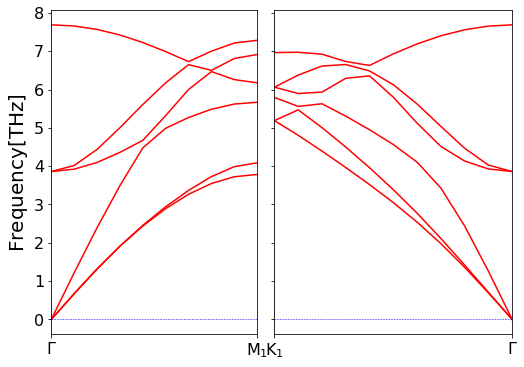

In [118]:
show_info(bandplot.plot_band_structure)
fig, axes = bandplot.plot_band_structure()
plt.show()

# class BandsPlot

In [119]:
bandsplot = BandsPlot(band_structures=band_structures)
show_info(bandsplot, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Band structure plot class.
    

# ----
# init
# ----

        Init.

        Args:
            band_structures (list): List of BandStructure class object.
        

# ---------------
# attribute names
# ---------------
['_band_structures',
 '_bandplots',
 '_axes_distances',
 '_ylim',
 '_min_frequency',
 '_max_frequency',
 '_cs',
 '_alphas',
 '_linewidths',
 '_linestyles']

# ------
# values
# ------
{'_alphas': [1.0, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 1.0],
 '_axes_distances': [0.18199165348086138, 0.21014586024793508],
 '_band_structures': [<phonopy.phonon.band_structure.BandStructure object at 0x7f92fc4fe450>,
 '_bandplots': [<twinpy.plot.band_structure.BandPlot object at 0x7f92fc535050>,
 '_cs': ['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r'],
 '_linestyles': ['dashed',
                 'dotted',
                 'dotted',
                 'dotted',
                 'dotted',
                 'd

## def plot_band_structures

====== START method information ======

# ---------
# docstring
# ---------

        Plot band structures.

        Returns:
            fig: Figure.
            axes (list): Axes.
        

======= END method information =======




(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f92f8a3f150>])

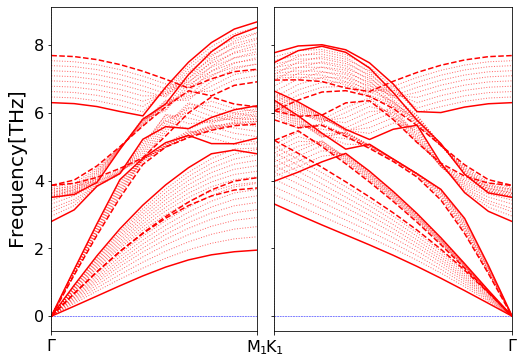

In [120]:
show_info(bandsplot.plot_band_structures)
bandsplot.plot_band_structures()